In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset
demand_stock = pd.read_csv('/content/demand_stock.data.csv')

# Display the first few rows of the dataset
demand_stock.head()


,Unnamed: 0,Demand,Stock
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [5]:
# Check for missing values
print(demand_stock.isnull().sum())

# Display data types
print(demand_stock.dtypes)


Unnamed: 0    0
Demand        0
Stock         0
dtype: int64
Unnamed: 0      int64
Demand        float64
Stock         float64
dtype: object


In [6]:
# Define features and target variable
X = demand_stock[['Stock']]
y = demand_stock['Demand']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.8887235474970236
R^2 Score: 0.6702928653566578


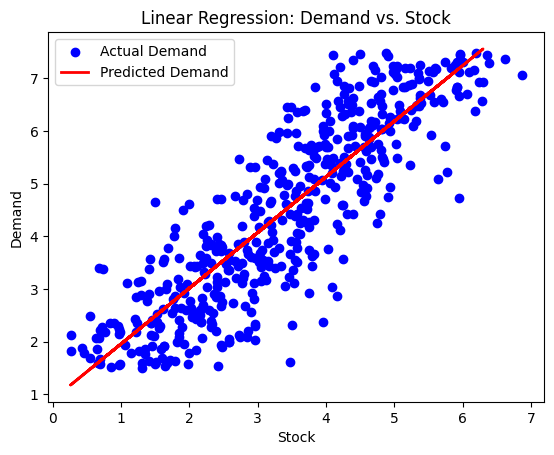

In [7]:
# Visualizing the regression line
plt.scatter(X, y, color='blue', label='Actual Demand')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Demand')
plt.title('Linear Regression: Demand vs. Stock')
plt.xlabel('Stock')
plt.ylabel('Demand')
plt.legend()
plt.show()


# 1.	Relationship between Demand and Supply
# IT IS POSITIVE !!!
# THERE IS DIRECT RELATIONSHIP BETWEEN THEM.

# With a positive coefficient for stock, the Demand goes up with the increase in stock.
# This may mean that greater availability attracts more buyers- perhaps due to plainer prices or more accessible inventory and the stocks.



In [13]:
# Load the dataset
demand_supply = pd.read_csv('/content/demand_supply.data.csv')

# Display the first few rows
demand_supply.head()


,Unnamed: 0,Price,Supply,Demand
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [9]:
# Check for missing values
print(demand_supply.isnull().sum())


Unnamed: 0    0
Price         0
Supply        0
Demand        0
dtype: int64


In [10]:
# Define features and target variable
X_multi = demand_supply[['Supply', 'Price']]
y_multi = demand_supply['Demand']

# Split the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create a Multiple Linear Regression model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = model_multi.predict(X_test_multi)

# Calculate metrics
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f'Mean Squared Error (Multiple Regression): {mse_multi}')
print(f'R^2 Score (Multiple Regression): {r2_multi}')


Mean Squared Error (Multiple Regression): 0.4522479816837192
R^2 Score (Multiple Regression): 0.9751106638519218


In [ ]:
# Visualizing the regression line
plt.scatter(X, y, color='blue', label='Actual Demand')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Demand')
plt.title('Linear Regression: Demand vs. Stock')
plt.xlabel('Stock')
plt.ylabel('Demand')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


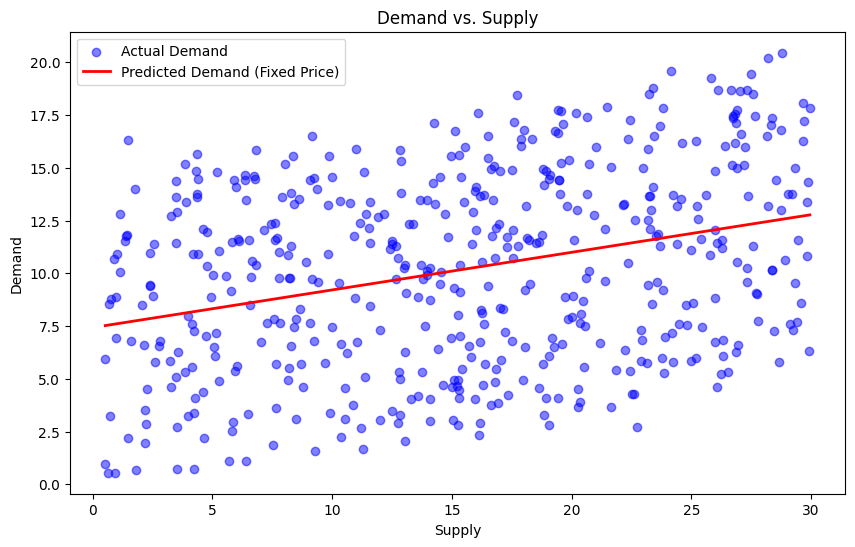

In [14]:
# Visualize Demand vs. Supply
plt.figure(figsize=(10, 6))
plt.scatter(demand_supply['Supply'], demand_supply['Demand'], color='blue', alpha=0.5, label='Actual Demand')
plt.title('Demand vs. Supply')
plt.xlabel('Supply')
plt.ylabel('Demand')

# Create a grid of Supply values
supply_range = np.linspace(demand_supply['Supply'].min(), demand_supply['Supply'].max(), 100)
# Assume a fixed price for visualization (you can choose a median or mean price)
fixed_price = demand_supply['Price'].mean()
# Predict Demand for each Supply value at the fixed price
predicted_demand = model_multi.predict(np.array([[supply, fixed_price] for supply in supply_range]))

plt.plot(supply_range, predicted_demand, color='red', linewidth=2, label='Predicted Demand (Fixed Price)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


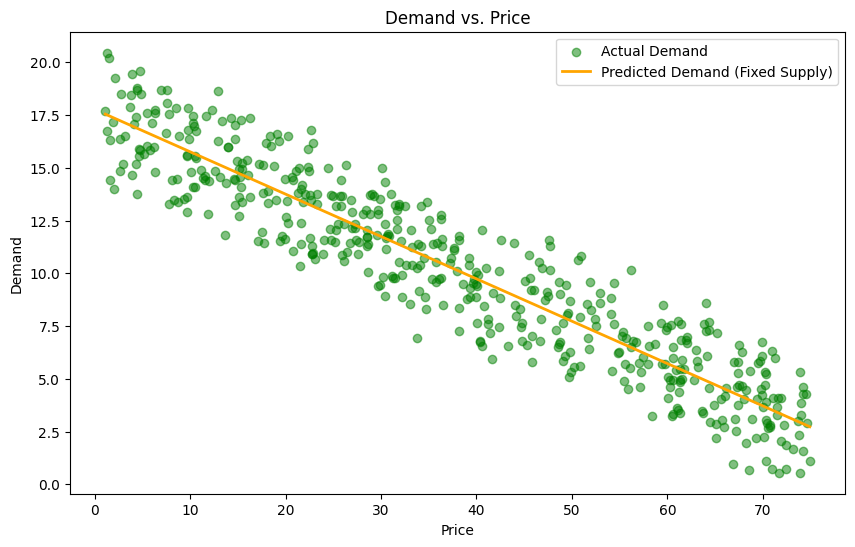

In [15]:
# Visualize Demand vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(demand_supply['Price'], demand_supply['Demand'], color='green', alpha=0.5, label='Actual Demand')
plt.title('Demand vs. Price')
plt.xlabel('Price')
plt.ylabel('Demand')

# Create a grid of Price values
price_range = np.linspace(demand_supply['Price'].min(), demand_supply['Price'].max(), 100)
# Assume a fixed supply for visualization (you can choose a median or mean supply)
fixed_supply = demand_supply['Supply'].mean()
# Predict Demand for each Price value at the fixed supply
predicted_demand_price = model_multi.predict(np.array([[fixed_supply, price] for price in price_range]))

plt.plot(price_range, predicted_demand_price, color='orange', linewidth=2, label='Predicted Demand (Fixed Supply)')
plt.legend()
plt.show()


# 1.	Relationship between Demand and Supply
# IT IS POSITIVE !!!
# THERE IS DIRECT RELATIONSHIP BETWEEN THEM.
# With a positive coefficient for Supply, the Demand goes up with the increase in Supply.
# This may mean that greater availability attracts more buyers- perhaps due to plainer prices or more accessible supplies.

# 2.	Relationship between Demand and Price
# IT IS NEGATIVE
# THERE IS INVERSE RELATIONSHIP BETWEEN THEM.
# If the coefficient for Price is negative, that implies that as Price increases, Demand decreases. This follows the basic economic principle: higher prices tend to reduce demand.
# If the coefficient is positive, this would imply that with an increased Price, Demand also increases. This is unusual and can perhaps happen in the case of luxury items, where higher prices are associated with high value or exclusivity.

